In [5]:
import numpy as np
import pandas as pd


experiment_name = 'Prod Run-K80'

df = pd.read_json('experiments/' + experiment_name + '/stats/stats.json')
df_yolov3 = pd.read_json('experiments/' + experiment_name + '/stats/stats_yolov3.json')
df = pd.concat([df,df_yolov3])
df.describe()


,name,yolov5s,yolov5x,mask_rcnn,faster_rcnn,retinanet,SSD,yolov3
count,9880.000000,4880.000000,4880.000000,4880.000000,4880.000000,4880.000000,4880.000000,5000.000000
mean,286098.192814,34.502729,165.227336,373.356135,335.348592,388.091120,94.633280,105.729097
std,165627.129338,3.100849,12.803502,49.928037,29.773518,34.802851,6.846521,7.778399
min,139.000000,23.472160,88.559677,208.138336,194.426910,219.976440,79.123169,59.499168
25%,146307.250000,32.985840,160.276844,344.693565,322.591232,372.884949,91.505789,103.208611
50%,286878.000000,34.165838,163.947632,365.691757,333.858871,390.073517,94.592464,105.016384
75%,429639.750000,35.406631,168.002075,397.723022,356.366966,413.105125,97.471853,106.800774
max,581781.000000,81.476669,243.139099,639.214600,542.257690,523.422058,215.869339,176.033508


In [6]:
df_ap = pd.read_json('experiments/' + experiment_name + '/stats/modelsummary.json')
df_ap

,model_name,AP,Inference
0,yolov5s,0.309178,34.502729
1,yolov5x,0.445590,165.227336
2,mask_rcnn,0.335494,373.356135
3,faster_rcnn,0.328034,335.348592
4,retinanet,0.260270,388.091120
5,SSD,0.162389,94.633280
6,yolov3,0.367501,105.729097


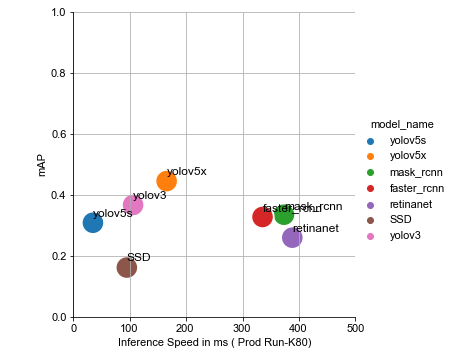

In [7]:
# Evaluation takes time to calculate MSCOCO metrics for every categori in the dataset. 
# therefore output saved as png
from IPython.display import Image
Image('experiments/' + experiment_name + '/stats/modelsummary.png')

Using cache found in /Users/bariscekic/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-21 torch 1.9.0 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/bariscekic/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-21 torch 1.9.0 CPU

Fusing layers... 
Model Summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 
/Users/bariscekic/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


ModelName : 	 yolov5s_________________________________________
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.25s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=8.76s).
Accumulating evaluation results...
DONE (t=1.81s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.309
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.452
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.341
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.362
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.414
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.249
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.360
 A

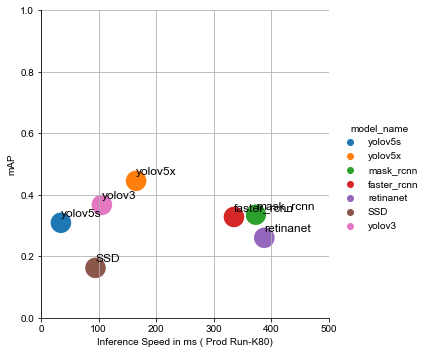

In [8]:
from numpy import np
from experiment import *

exp = Experiment(name="Prod Run-K80", dry_run=False)

yolo_v5s = YOLO(version='V5S')
yolo_v5x = YOLO(version='V5X')
faster_rcnn = FasterRCNN()
mask_rcnn = MaskRCNN()
retinanet = RetinaNet()
ssd = SSD()

exp.add_model(yolo_v5s)
exp.add_model(yolo_v5x) 
exp.add_model(mask_rcnn)
exp.add_model(faster_rcnn)
exp.add_model(retinanet)
exp.add_model(ssd)


#exp.run_experiment()
exp.evaluate_results()

# hacky solution to overcome library name duplicate in Pytorch hub model
yolo_v3 = YOLO(version='V3', model_name_only=True)
exp.add_model(yolo_v3)
exp.evaluate_results(previous_result_to_merge= "experiments/" + str(exp.experiment_name) + "/stats/stats_yolov3.json", by_category=False)
%matplotlib inline
exp.plot_results() # some models inference are higher than 5sec in CPU.